In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_df = pd.read_csv('IMDb Movies India.csv',encoding='ISO-8859-1')

In [3]:
csv_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
csv_df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [5]:
csv_df.shape

(15509, 10)

In [6]:
# count of missing values in each columns
csv_df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

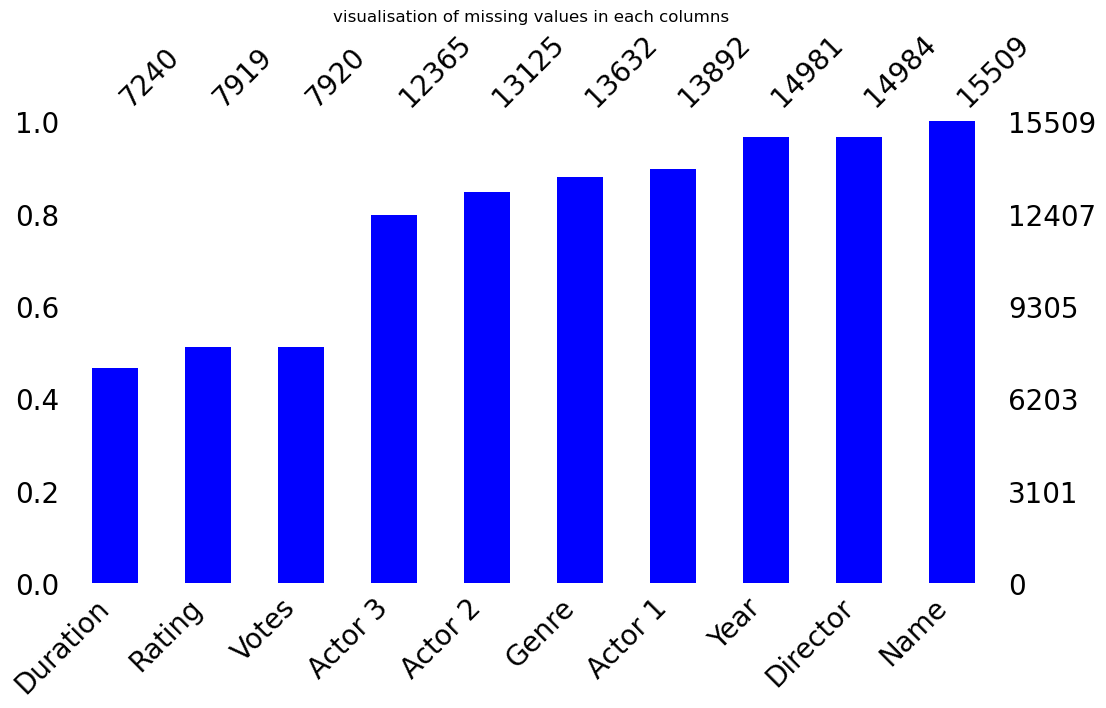

In [7]:
# visualising missing values in each columns 
import missingno as msno
msno.bar(csv_df,color='blue',sort='ascending',fontsize=20,figsize=(12,6))
plt.title('visualisation of missing values in each columns ');

# Pre-processing or Cleanup of dataset

In [8]:
# drop rows with missing values
drop = ['Name','Year','Duration','Genre','Rating','Votes','Director','Actor 1','Actor 2','Actor 3']
data = csv_df.copy()
data.dropna(subset=drop,inplace=True)

In [9]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [10]:
def clean_values_1(data_values):
    values= []
    for n in data_values:
        try:
            g = [w for w in n]
#           Remove signs from all columns
            values.append(''.join(filter(str.isdigit,g)))
        except:
            pass
        #   Change datatype from objects to int
    f = [int(num) for num in values]
    return f
data_1 = clean_values_1(data['Votes'])
data_2 = clean_values_1(data['Year'])
data_3 = clean_values_1(data['Duration'])

In [11]:
data['Votes'] = data_1
data['Year'] = data_2
data['Duration'] = data_3

In [12]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [13]:
# count of missing values in each columns
data.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

# Exploratory Analysis & Visualization

In [14]:
# top rated movies
highly_rated = data.sort_values(by='Rating',ascending=False).head(10)

In [15]:
highly_rated

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
13231,Sindhustan,2019,64,"Documentary, Family, History",9.3,36,Sapna Bhavnani,Leila Advani,Laj Badlani,Chaho Bhara
8344,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
12673,Secrets of Sinauli,2021,56,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
11843,Refl3ct,2021,65,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar


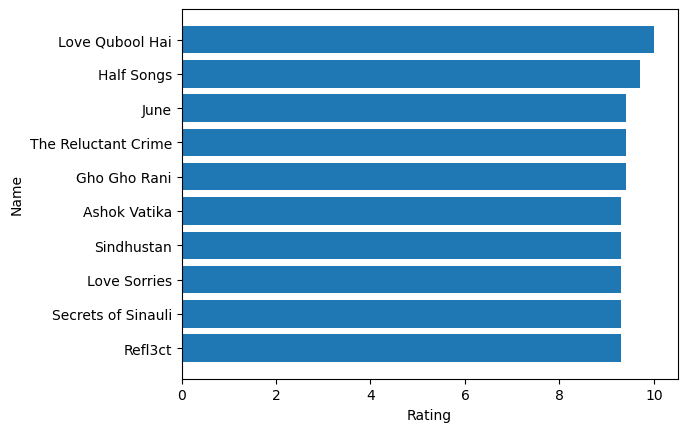

In [16]:
# visualisation of top rated movies
plt.barh(highly_rated['Name'],highly_rated['Rating'])
plt.xlabel('Rating')
plt.ylabel('Name')
plt.gca().invert_yaxis()

In [17]:
# less rated movies
lowest_rated = data.sort_values(by='Rating',ascending=True).head(10)

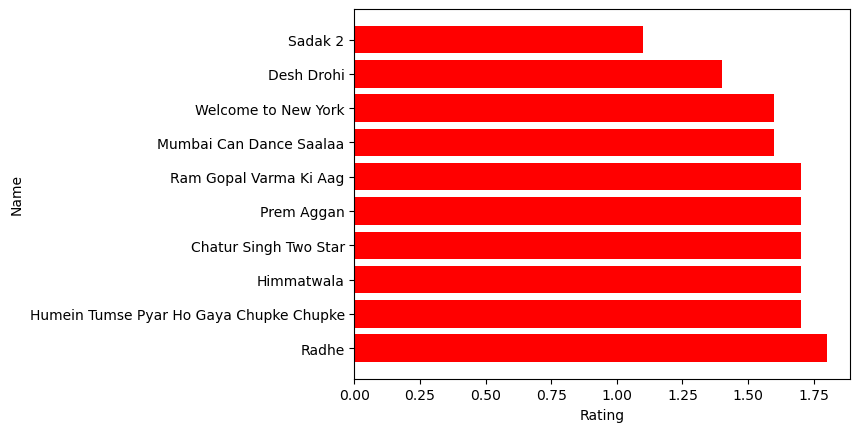

In [18]:
# lowest rated genre
# visualisation of top rated movies
plt.barh(lowest_rated['Name'],lowest_rated['Rating'],color='red')
plt.xlabel('Rating')
plt.ylabel('Name')
plt.gca().invert_yaxis()

In [19]:
actors = pd.concat([data['Actor 1'],data['Actor 2'],data['Actor 3']])
actors_counts = actors.value_counts(ascending=False).reset_index()
actors_counts.columns= ['Actors','Movies']

In [20]:
actors_counts

,Actors,Movies
0,Mithun Chakraborty,160
1,Amitabh Bachchan,148
2,Dharmendra,146
3,Ashok Kumar,124
4,Akshay Kumar,120
...,...,...
5036,Rajeev Dassani,1
5037,Rehaan Engineer,1
5038,Glenn,1
5039,Pernia Qureshi,1


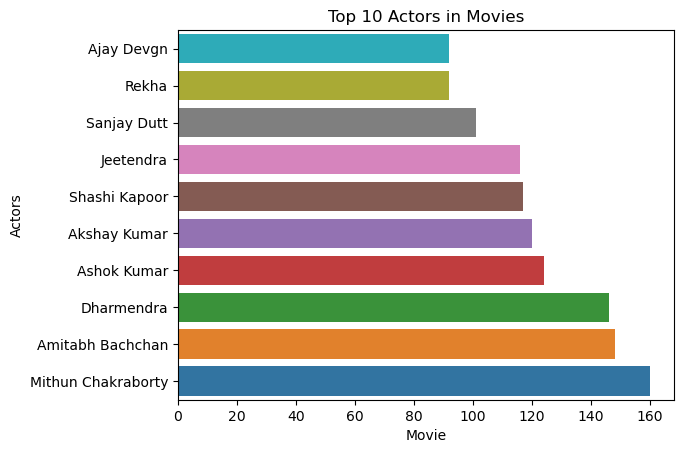

In [21]:
sns.barplot(y='Actors',x='Movies',data=actors_counts.head(10))
plt.xlabel('Movie')
plt.ylabel('Actors')
plt.gca().invert_yaxis()
plt.title('Top 10 Actors in Movies');

In [22]:
directors = data['Director']
director_count = data['Rating'].groupby(data['Director']).mean()

In [23]:
director_count=director_count.sort_values(ascending=False).reset_index()

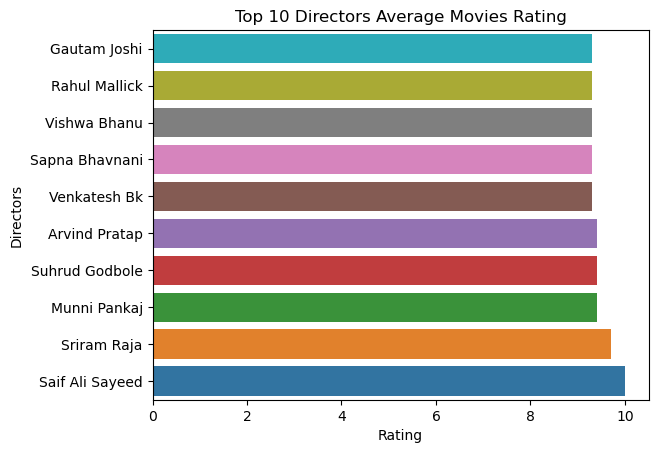

In [24]:
sns.barplot(y='Director',x='Rating',data=director_count.head(10))
plt.xlabel('Rating')
plt.ylabel('Directors')
plt.gca().invert_yaxis()
plt.title('Top 10 Directors Average Movies Rating');

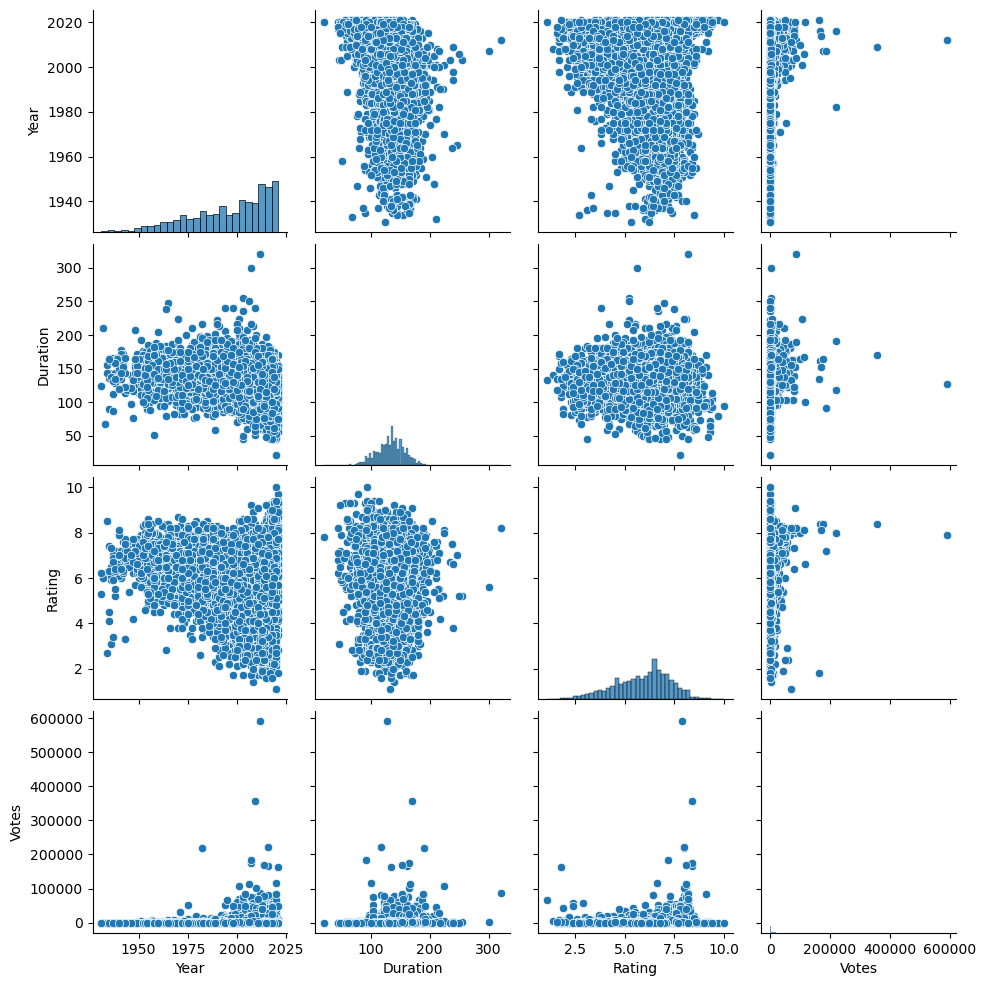

In [25]:
sns.pairplot(data);

# Feature Engineering

In [27]:
# look at datatypes
data.dtypes.reset_index()

,index,0
0,Name,object
1,Year,int64
2,Duration,int64
3,Genre,int32
4,Rating,float64
5,Votes,int64
6,Director,int32
7,Actor 1,int32
8,Actor 2,int32
9,Actor 3,int32


In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Encoding the Genre and Actors column to numerical values
data.iloc[:,3] = labelencoder.fit_transform(data.iloc[:,3].values)
data.iloc[:,6] = labelencoder.fit_transform(data.iloc[:,6].values)
data.iloc[:,7] = labelencoder.fit_transform(data.iloc[:,7].values)
data.iloc[:,8] = labelencoder.fit_transform(data.iloc[:,8].values)
data.iloc[:,9] = labelencoder.fit_transform(data.iloc[:,9].values)

# Training and Testing Model

In [28]:
# 'X' independent variable and 'Y' dependent variaable
X = data.iloc[:].drop(['Rating','Name'],axis=1)
Y = data['Rating']

In [35]:
Y

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64

In [29]:
# split the dataset into 80% training and 20% testing and using cross validation score to compare model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [30]:
# scale the data making it easier and faster for the model to train on the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
# create a fuction with seven machine learning models or techniqus
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def machine(X_train, Y_train):
    
# #   use Linear Regression
    from sklearn.linear_model import LinearRegression
    lin = LinearRegression()
    lin.fit(X_train,Y_train)
    pred = lin.predict(X_test)
    
#   use Decision Tree Regression
    from sklearn.tree import DecisionTreeRegressor
    tree = DecisionTreeRegressor()
    tree.fit(X_train,Y_train)
    pred2 = tree.predict(X_test)
  
    
#   use Random Forest Regression
    from sklearn.ensemble import RandomForestRegressor
    forest = RandomForestRegressor()
    forest.fit(X_train,Y_train)
    pred3 = forest.predict(X_test)
    

#   print the accuracy of each model
    print('[0]MAE Linear Regression Accuracy:', mean_absolute_error(Y_test,pred))
    print('[0]MSE Linear Regression Accuracy:', mean_squared_error(Y_test,pred))
    print('[0]R2 Linear Regression Accuracy:', r2_score(Y_test,pred))
    print()
#   print the accuracy of each model
    print('[1]MAE Decision Tree Regression Accuracy:', mean_absolute_error(Y_test,pred2))
    print('[1]MSE Decision Tree Regression Accuracy:', mean_squared_error(Y_test,pred2))
    print('[1]R2 Decision Tree Regression Accuracy:', r2_score(Y_test,pred2))
    print()
#   print the accuracy of each model
    print('[2]MAE Random Forest Regression Accuracy:', mean_absolute_error(Y_test,pred3))
    print('[2]MSE Random Forest Regression Accuracy:', mean_squared_error(Y_test,pred3))
    print('[2]R2 Random Forest Regression Accuracy:', r2_score(Y_test,pred3))
    
    return lin,tree,forest




In [32]:
# train all models
machine = machine(X_train,Y_train)

[0]MAE Linear Regression Accuracy: 1.0495625054893818
[0]MSE Linear Regression Accuracy: 1.6864004365428573
[0]R2 Linear Regression Accuracy: 0.0892905505218129

[1]MAE Decision Tree Regression Accuracy: 1.216077738515901
[1]MSE Decision Tree Regression Accuracy: 2.5252473498233217
[1]R2 Decision Tree Regression Accuracy: -0.3637132521552233

[2]MAE Random Forest Regression Accuracy: 0.8531104240282683
[2]MSE Random Forest Regression Accuracy: 1.272633903710247
[2]R2 Random Forest Regression Accuracy: 0.31273753450206654


In [33]:
# chose Linear Regression for predicition
prediction = machine[1].predict(X_test)

In [34]:
prediction

array([6.3, 5.2, 2.5, ..., 6.3, 4.4, 6.7])